In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np


In [7]:
#instantiating the tokenizer
tokenizer = Tokenizer()

#storing the training sequence in a single string variable
sentence = "the scope of deep learning has been increasing at an exponential rate \n the reason deep learning has bloomed is hidden in the fact that their exists a vast number of applications in todays world that we take for granted \n from using hey siri on our iphone (trigger word detection) \n to using automatic replys on our gmail/linkedin (sentiment analysis) \n deep learning has automated our world without us even realising \n the world needs deep learning to sustain as it has become necessary"
corpus = sentence.lower().split("\n") #converting the sentence to lowercase and storing each word as a separate iterable string in a list

tokenizer.fit_on_texts(corpus) #creates tokens of each words as a dictionary with key being word and the value beings its token
total_words = len(tokenizer.word_index) + 1 #calculating total number of words in the initial sentence

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'deep': 2, 'learning': 3, 'has': 4, 'world': 5, 'our': 6, 'of': 7, 'in': 8, 'that': 9, 'using': 10, 'on': 11, 'to': 12, 'scope': 13, 'been': 14, 'increasing': 15, 'at': 16, 'an': 17, 'exponential': 18, 'rate': 19, 'reason': 20, 'bloomed': 21, 'is': 22, 'hidden': 23, 'fact': 24, 'their': 25, 'exists': 26, 'a': 27, 'vast': 28, 'number': 29, 'applications': 30, 'todays': 31, 'we': 32, 'take': 33, 'for': 34, 'granted': 35, 'from': 36, 'hey': 37, 'siri': 38, 'iphone': 39, 'trigger': 40, 'word': 41, 'detection': 42, 'automatic': 43, 'replys': 44, 'gmail': 45, 'linkedin': 46, 'sentiment': 47, 'analysis': 48, 'automated': 49, 'without': 50, 'us': 51, 'even': 52, 'realising': 53, 'needs': 54, 'sustain': 55, 'as': 56, 'it': 57, 'become': 58, 'necessary': 59}
60


In [8]:
input_sequences = [] #training features (xs) will be a list

for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] #converts each sentence as its tokenized equivalent
	#print(token_list)
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1] #generating n gram sequences: 1st two words in the token_list is one sequence, next two words are another sequence and so on
		#print(n_gram_sequence)
		input_sequences.append(n_gram_sequence) #appending each n gram sequence to the list of our features (xs)
		#print(input_sequences)
#print("The training features are:\n",input_sequences)	

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences]) #calculating the length of the longest sequence in our training features (xs)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) #pre-pading each value of the input_sequence
#print(input_sequences)
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1] #creating xs and their labels using numpy slicing
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) #creating one hot encoding values of each labels to make our ys

In [9]:
print(tokenizer.word_index)

{'the': 1, 'deep': 2, 'learning': 3, 'has': 4, 'world': 5, 'our': 6, 'of': 7, 'in': 8, 'that': 9, 'using': 10, 'on': 11, 'to': 12, 'scope': 13, 'been': 14, 'increasing': 15, 'at': 16, 'an': 17, 'exponential': 18, 'rate': 19, 'reason': 20, 'bloomed': 21, 'is': 22, 'hidden': 23, 'fact': 24, 'their': 25, 'exists': 26, 'a': 27, 'vast': 28, 'number': 29, 'applications': 30, 'todays': 31, 'we': 32, 'take': 33, 'for': 34, 'granted': 35, 'from': 36, 'hey': 37, 'siri': 38, 'iphone': 39, 'trigger': 40, 'word': 41, 'detection': 42, 'automatic': 43, 'replys': 44, 'gmail': 45, 'linkedin': 46, 'sentiment': 47, 'analysis': 48, 'automated': 49, 'without': 50, 'us': 51, 'even': 52, 'realising': 53, 'needs': 54, 'sustain': 55, 'as': 56, 'it': 57, 'become': 58, 'necessary': 59}


In [11]:
model = Sequential() #creating a sequential model
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1)) #adding an embedding layer with 64 as the embedding dimension
model.add(Bidirectional(LSTM(20))) #adding 20 LSTM units
model.add(Dense(total_words, activation='softmax')) #creating a dense layer with 54 output units (total_words) with softmax activation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #compiling the model with adam optimiser
history = model.fit(xs, ys, epochs=500, verbose=1) #training for 500 epochs

Epoch 1/500
3/3 [==============================] - 4s 21ms/step - loss: 4.0931 - accuracy: 0.0133
Epoch 2/500
3/3 [==============================] - 0s 23ms/step - loss: 4.0857 - accuracy: 0.0133
Epoch 3/500
3/3 [==============================] - 0s 23ms/step - loss: 4.0781 - accuracy: 0.0533
Epoch 4/500
3/3 [==============================] - 0s 21ms/step - loss: 4.0712 - accuracy: 0.0667
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 4.0631 - accuracy: 0.0667
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 4.0544 - accuracy: 0.0667
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 4.0449 - accuracy: 0.0667
Epoch 8/500
3/3 [==============================] - 0s 19ms/step - loss: 4.0326 - accuracy: 0.0667
Epoch 9/500
3/3 [==============================] - 0s 21ms/step - loss: 4.0185 - accuracy: 0.0533
Epoch 10/500
3/3 [==============================] - 0s 24ms/step - loss: 4.0039 - accuracy: 0.0533
Epoch 11/500
3/3 [=

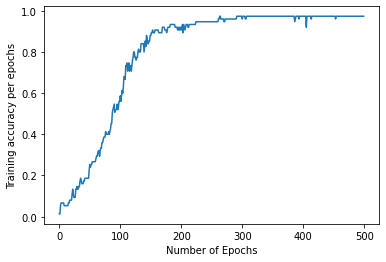

In [12]:
#plotting the training accuracy of the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training accuracy per epochs')
plt.show()

In [30]:
words = []
for i in tokenizer.word_index.keys():
  words.append(i)
words

['the',
 'deep',
 'learning',
 'has',
 'world',
 'our',
 'of',
 'in',
 'that',
 'using',
 'on',
 'to',
 'scope',
 'been',
 'increasing',
 'at',
 'an',
 'exponential',
 'rate',
 'reason',
 'bloomed',
 'is',
 'hidden',
 'fact',
 'their',
 'exists',
 'a',
 'vast',
 'number',
 'applications',
 'todays',
 'we',
 'take',
 'for',
 'granted',
 'from',
 'hey',
 'siri',
 'iphone',
 'trigger',
 'word',
 'detection',
 'automatic',
 'replys',
 'gmail',
 'linkedin',
 'sentiment',
 'analysis',
 'automated',
 'without',
 'us',
 'even',
 'realising',
 'needs',
 'sustain',
 'as',
 'it',
 'become',
 'necessary']

In [41]:
#predicting the next word using an initial sentence
seed_text = "scope of artificial intelligence"
next_words = 5
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0] #converting our seed_text to tokens and excluding the out of vcabulary words
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') #padding the seed_text
  predicted = model.predict(token_list, verbose=0) #predicting the token of the next word using our trained model
  #print(predicted)
  predict_ind = np.argmax(predicted)
  #print(words[np.argmax(predicted)])
  output_word = "" #initialising output word as blank at the beginning
  for word, index in tokenizer.word_index.items():
    if index == predict_ind:
      output_word = word #converting the token back to the corresponding word and storing it in the output_word
      break
  seed_text += " " + output_word
print(seed_text)

scope of artificial intelligence deep learning has automated our


In [27]:
type(tokenizer.word_index.values()

dict_values